# Lab Session 4: Version control with Jupytext

* **Statistics 159/259, Spring 2022**
* Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
* 02/14/2022


Useful links: 

- [Jupytext Repository](https://github.com/mwouts/jupytext/blob/main/README.md)
- [JupyterHub](https://stat159.datahub.berkeley.edu/hub/login?next=%2Fhub%2F)
- [Convenient credentials management](https://ucb-stat-159-s22.github.io/site/lectures/intro-git/Git-Tutorial.html#convenient-credentials-management)

## Some common mistakes when working with Git

1. As a general rule, never create or clone new repositories inside an old repository. Unless you do this very carefully, git won't know a priori which repository are you trying to manipulate. Can you think in an example where we can manipulate two repositories at the same time or an example where one repository has being clone inside another?

1. When you create a new repository, if you don't give permision to that repository to be manipulated with the [authentication app](https://ucb-stat-159-s22.github.io/site/lectures/intro-git/Git-Tutorial.html#convenient-credentials-management) then you won't be able to push to that repository. In this case, you would see the following error message:
```
remote: Write access to repository not granted.
fatal: unable to access 'https://github.com/facusapienza21/test.git/': The requested URL returned error: 403
```
In this case, you need to go to `configure` in the [stat159 Berkeley DataHub access app](https://github.com/apps/stat159-berkeley-datahub-access).

1. If the authentitication app still don't work for you, try again to run the command 
```
git config -f $HOME/.gitconfig.local credential.helper "store --file=/tmp/github-app-git-credentials"
```
Even if you are able to push changes to your repository using your token and this is the way in which you can use GitHub when working in your local machine, we highly recommend you to use the authentication app. 

## Jupytext

A common problem when working with Jupyter notebooks is how to do version control. Even a small change in a Jupyter notebook can produce multiple changes in the `.ipynb` file. Besides, Jupyter notebooks are written on JSON, which could be difficult to read but also problematic at the moment of solving conflicts in git given that we need to manually decide which changes we want to keep or remove during a merge conflict.

In the course, we are going to explore two different ways of performing version control in Jupyter notebooks. Today we will focus in the first one, Jupytext. 

<img src=https://raw.githubusercontent.com/mwouts/jupytext/main/docs/logo_large.png width="500">

For a short but very complete presentation of all the capabilities of Jupytext, we recommend you watching Marc Wouts's talk in JupyterCon 2020:

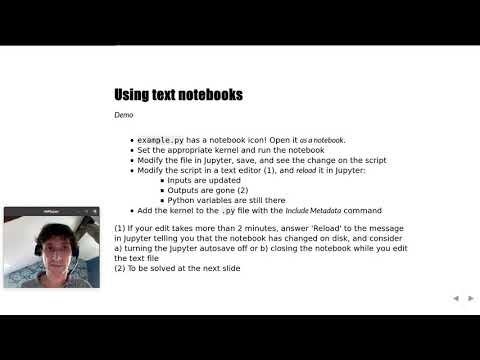

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('SDYdeVfMh48')

In the JupyterHub for the course we already have installed `jupytext` and also the extension for JupyterLab. We can check all the packages we have installed by executing either `conda list` or `mamba list` in bash. We can also search for specific packages by using

In [1]:
%%bash
#pip show jupytext
conda list | grep jupytext

jupytext                  1.11.5             pyhd0ecf6b_0    conda-forge


Ideally, we would like to see something similar as what we see when we run `git diff` after we had made changes to a text file. How does Jupytext manage to do this? The idea is to pair the notebook with a more simple or readable file format. As it is very well explained in the [Jupytext documentation](https://github.com/mwouts/jupytext/blob/main/README.md), there are many ways to pair a notebook with a secondary file. For today's lab, we are going to practice
1. Using the commands in JupyterLab
1. `jupytext` at the terminal line

We can also decide the [format](https://github.com/mwouts/jupytext/blob/main/docs/formats.md) of the paired notebook, depending what is the content in the notebook. 

**Take your time to read the documentation!** The Jupytext team made an excellent job in explaining the different ways of how you can pair notebooks and the different formats you can use for the Jupyter notebook companion:
1. [README](https://github.com/mwouts/jupytext/blob/main/README.md) provides a general description of how Jupytext works.
1. [Paired Notebooks](https://github.com/mwouts/jupytext/blob/main/docs/paired-notebooks.md)
1. [Formats](https://github.com/mwouts/jupytext/blob/main/docs/paired-notebooks.md)

Notice that in the [command palette](https://jupyterlab.readthedocs.io/en/stable/user/commands.html#access-palette) in 3.0+ versions of JupyterLab has moved to a modal window. You can enter it by `View > Active Commnad Palette` or with the shortcut `Command/Ctrl Shift C`.

## 1. Jupytext Solo

Let's start by creating file-notebooks pairs.

1. Create a notebook with some simple Python code in your repository. 
1. Pair the notebook using the commands in JupyterLab (enter the Command Palette and search `jupytext`). Which format do you think is more convenient for pairing your notebook?
1. Make some experiments:
    1. What happens when you change the content in the notebook? are these changes reflected in the paired file?
    1. What happens when you instead modify the text file?
1. If you don't change the default configuration, Jupyter notebooks will autosave and this could generate a conflict if you are making modifications in both paired files. You can keep the default configuration, but then you should be careful about which one is the updated version of the notebook. You can remove the autosave configuration from the same command palette (Autosave Documents).
1. By default, the companion file will be open with the text editor. However, notice you can open it as a Jupyter notebook (`Open With > Notebook`). 
1. What happens when you delete the companion file? Remember: until you don't save the notebook again you won't see the changes. 
1. Explore some of the other formats that Jupytext offers to pair your notebook. Try to imagine in which context would you use each one of them
    - markdown (`.md`)
    - The `light` format
    - The `percent` format

### Alternative ways of creating paired notebooks

As we mentioned before, this is not the only way of creating paired notebooks. Notice that we have a Jupytext reference / FAQ option in the command palette.

**From the terminal**

1. You can use jupytext to converse between different formats. See the [documentation](https://jupytext.readthedocs.io/en/latest/using-cli.html) to get the exact steps. For example, You can convert a notebook to a markdown file using `jupytext --to markdown <notebook name>`.
1. Are the paired files synchronized? This last step just creates a copy of the notebook in a different format. In order to create a paired notebook, you have to execute the sync command `jupytext --set-formats ipynb,<format> <notebook name>`.
1. How do you unpair a notebook from the terminal? 

You can also explore how to make a **Global configuration in a `jupytext.toml` file**. 

## 2. Now in Git

1. Create a paired notebook inside a Git repository. For example, you can use the `test` repository we were using during the last labs.
1. Make a first commit to both paired notebook and companion file. Then, make small changes in one of them (be sure those changes are being reflected in the second file).
1. Use the `diff` command in git to explore changes in the both files. What can you observe? More specifically, modify different elements of the notebook and see how these are reflected in the paired file. These could include:
    1. Changes in markdown or commented text
    1. Changes in the code inside cells
    1. Changes in the output of a cell (for example, an image)
    1. Changes in iPython commands (for example, magic commands).

## 3. Collaborative Jupytext: The return of Alice and Bob

As we did in the Lab 03, we are going to simulate the situation of more than one person collaborating in the same repository. We are going to set up a shared collaboration with one partner (the person sitting next to you). 
This will show the basic workflow of collaborating on a project with a small team where everyone has write privileges to the same repository. We will start with the same basic steps we did last time, but now on notebooks!

1. Alice creates a repository. She has being working in a Jupyter notebook. After she has learn how to use Jupytext, she need to decide whether include in the repository:
    - The Jupyter notebook alone
    - The companion file alone
    - Both paired files
1. What would you think is the best idea??? You can try more than one option and see how it goes.
1. Bob clones Alice's repository.
1. Bob wants to make changes to one of the notebook-style files from Alice (that is, a `ipynb` file or a companion file with the information to recreate a Jupyter notebook). How should he proceed? Does he need to configure Jupytext in his own computer too? Bob makes changes to a file and commits them **locally**.
1. Embracing chaos: let's generate a conflict... now Alice continues making changes to notebook and pushes his changes to Github. 
1. As we did in the last class, when Bob try to push his new changes to GitHub, he creates a commit message that conflicts with the last version from Alice. This forced Bob to make the changes in his local machine, by doing `git pull` and solving the merge problem (remember that a `git pull` is equivalent to `git fetch` + `git merge`). Does Jupytext help Bob to solve the conflict??? How should he proceed in order to solve the conflict? 